In [11]:
import pandas
import matplotlib.pyplot as plt

# Read the data
data = pandas.read_csv('./norm/norm10.csv', header=None)
data

,0,1,2,3
0,C,C,D,D
1,C,D,C,D
2,1,0,1,0


In [12]:
import pandas

data = pandas.read_csv('./stepNum-1000_population-400_s-0.900000_b-4_beta-3_c-1_gamma-1_norm-norm10.csv')
# data = pandas.read_csv('./stepNum-1000_population-400_s-1_b-4_beta-3_c-1_gamma-1_norm-norm10.csv')
data

EmptyDataError: No columns to parse from file

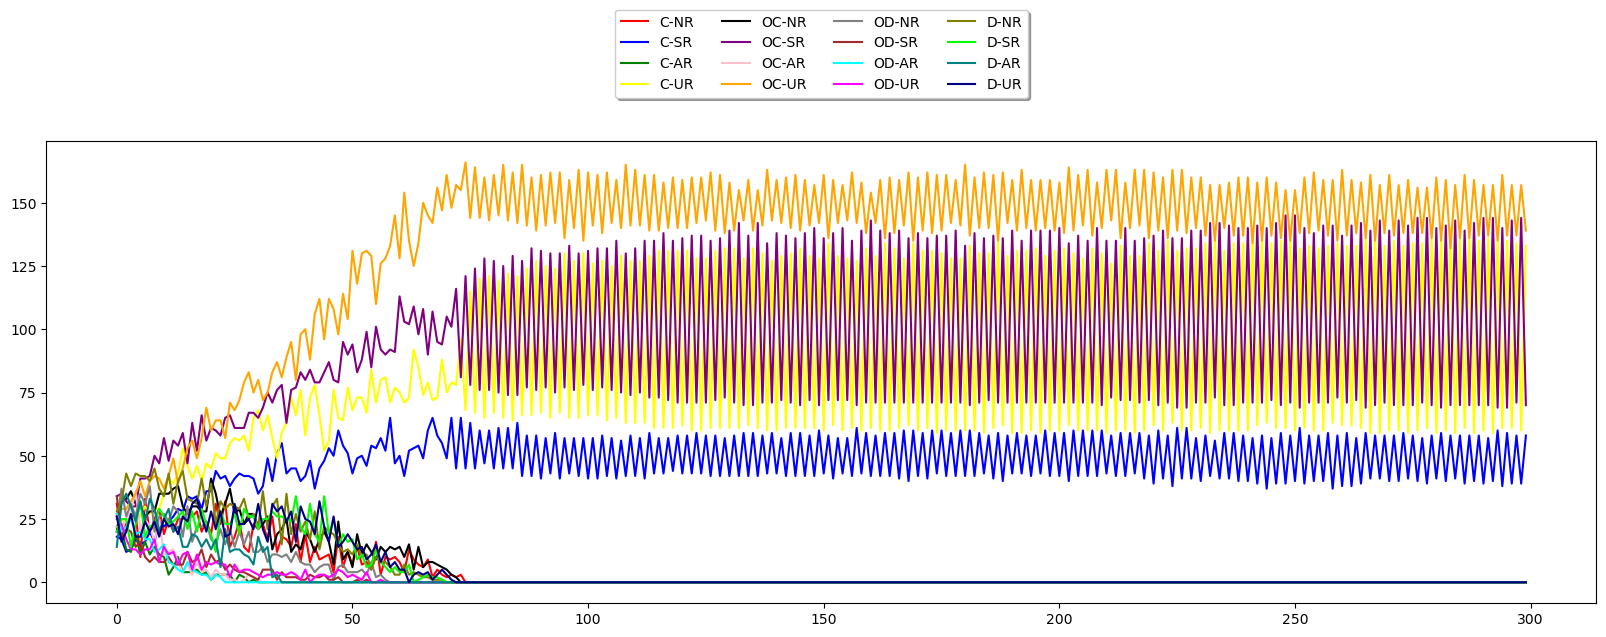

In [ ]:
# 第一列为横轴，第二列为纵轴画曲线，label为列名
# 设置cmap
colors = ['red', 'blue', 'green', 'yellow', 'black', 'purple', 'pink', 'orange', 'gray', 'brown', 'cyan', 'magenta',
          'olive', 'lime', 'teal', 'navy']
plt.figure(figsize=(20, 6))
for i in range(1, 17):
    plt.plot(data.iloc[:300, 0], data.iloc[:300, i], label=data.columns.values[i], color=colors[i - 1])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.30), ncol=4, fancybox=True, shadow=True)
plt.savefig('./norm10.png', dpi=600)